Equations describing the emission from a relativistic elliptical disk following the convention in section 5 in Strateva et al. (2003). 

Note that the following equations only work in the weak-field regime. It breaks down as the inner radius decreases below $100R_g$.

Parameterizing $X = \nu/\nu_0 - 1$, the total line flux in the observer's frame is $$F = \int\int\int F_X dX$$

The line profile $F_X$ can be expressed as follows.

$$F_X = \frac{M^2\nu_0\cos{i}}{d^2} \int_{\xi_1}^{\xi_2}\int_{-\pi/2}^{\pi/2} \xi I_{\nu_e} D^3 \Psi(\xi, \phi) d\phi d\xi $$
where 
$$ I_{\nu_e}(\xi, \nu_e) = \frac{\epsilon_0 \xi^{-q}}{4\pi\sqrt{2 \pi}\sigma} exp\left[ - \frac{(1+X-D)^2 \nu_0^2}{2\sigma^2D^2}\right]$$



$$\Psi(\xi, \phi) = 1 + \xi^{-1}\left(\frac{1-\sin{i}\cos{\phi}}{1+\sin{i}\cos{\phi}} \right)$$
$$\xi(\phi) = \frac{\xi(1+e)}{1-e\cos(\phi-\phi_0)}$$

$$ \frac{1}{D} = \gamma \left[\left({1 - \frac{2}{\xi}}\right)^{-1/2} - \frac{e\sin(\phi-\phi_0)\sqrt{1-(b/r)^2(1-2/\xi)}}{\sqrt{\xi(1-2/\xi)^3[1-e\cos(\phi-\phi_0)])}} + \frac{\sin{i}\sin{\phi}(b/r)\sqrt{(1-e\cos(\phi-\phi_0))}}{\sqrt{\xi{1-2/\xi)(1-\sin^2{i}\cos^2{\phi})}}}\right ]$$ 

$$ \frac{b}{r} \approx \sqrt{1-\sin{i}^2\cos{\phi}^2} \left[1 + \frac{1}{\xi}\frac{1-\sin{i}\cos{\phi}}{1+\sin{i}\cos{\phi}}\right] = \sqrt{1-\sin^2{i}\cos^2{\phi}} \Psi(\xi, \phi) $$

$$ \gamma = \left\{ 1 - \frac{e^2\sin^2(\phi-\phi_0) + (1-2/\xi)[1-e\cos(\phi-\phi_0)]^2}{\xi(1-2/\xi)^2[1-e\cos(\phi-\phi_0)]} \right\}^{-1/2}$$

There are 7 free parameters in this equation
$$ q, \xi_1, \xi_2, i, \sigma, \phi_0, e$$

To perform the fit in velocity space, I substituded the broadening parameter in frequency ($\sigma$) with $\frac{\sigma}{\nu_0}  c = \sigma_V$.
$$ I_{\nu_e}(\xi, \nu_e) = \frac{\epsilon_0 \xi^{-q} c}{4\pi\sqrt{2 \pi}\sigma_V} exp\left[ - \frac{(1+X-D)^2 c^2}{2 \sigma_V^2D^2}\right]$$


$$ I_{\nu_e}(\xi, \nu_e) = \frac{\epsilon_0 \xi^{-q} c}{4\pi\sqrt{2 \pi}\sigma_V} exp\left[ - \frac{(\frac{1+X}{D}-1)^2 c^2}{2 \sigma_V^2}\right]$$

My implementation ignores the disk intensity constant = $\frac{\epsilon_0 c}{4\pi}$ and normalizes the peak of the profile ($F_X$) to 1. 



References

[1] Eracleous et al. 1995 http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1995ApJ...438..610E&amp;data_type=PDF_HIGH&amp;whole_paper=YES&amp;type=PRINTER&amp;filetype=.pdf

[2] Chen & Halpern 1989 http://articles.adsabs.harvard.edu/pdf/1989ApJ...339..742C

[3] Strateva et al. 2003 https://iopscience.iop.org/article/10.1086/378367/pdf

In [1]:
from elliptical_disk_model import *
plt.rcParams.update({'text.usetex': False,
                     'mathtext.fontset': 'cm'})
# Evaluate the line profile in the velocity range of -0.04c to 0.05c 
X_grid = np.arange(-0.04, 0.05, 0.0011)

Reproduce Fig 3a in Eracleous (1995)
Disk line profiles with varying orientation angle


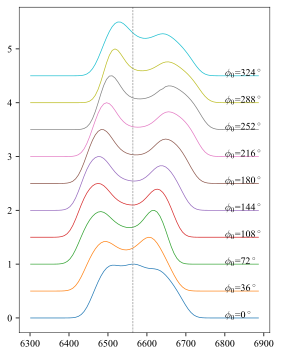

In [2]:
model_validate_phi0()

Reproduce Fig 3b in Eracleous (1995)
Disk line profiles with varying eccentricity


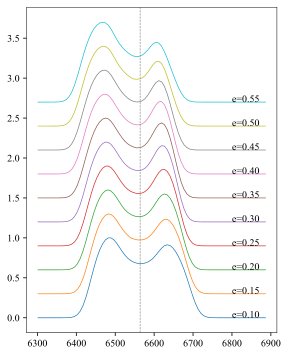

In [4]:
model_validate_ecc()

Reproduce Fig 3c in Eracleous (1995)
Disk line profiles with varying inner disk radius


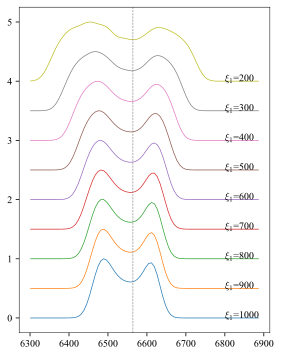

In [2]:
model_validate_rin()

In [10]:
# q, sig, incl, ecc, phi0, r1, r2
par_4a = [3.4, 1400, 34/180 * np.pi, 0.4, 210 * np.pi / 180, 900, 5000]
par_4b = [5, 1200, 42/180 * np.pi, 0.5, 195 * np.pi / 180, 1900, 3300]
par_4c = [2.3, 900, 27/180 * np.pi, 0.5, 220 * np.pi / 180, 450, 9800]
par_4d = [2.3, 900, 32/180 * np.pi, 0.22, 275 * np.pi / 180, 1600, 9700]
model_4a = e_model(par_4a, X_grid)
model_4b = e_model(par_4b, X_grid)
model_4c = e_model(par_4c, X_grid)
model_4d = e_model(par_4d, X_grid)


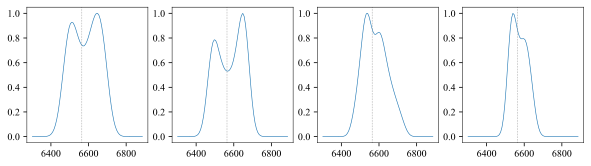

In [12]:
# Fig 4 in Eracleous+ (1995)
fig, ax = plt.subplots(1, 4, figsize=(10, 2.5))
ax[0].plot((X_grid + 1) * 6564, model_4a)
ax[1].plot((X_grid + 1) * 6564, model_4b)
ax[2].plot((X_grid + 1) * 6564, model_4c)
ax[3].plot((X_grid + 1) * 6564, model_4d)
for i in range(4):
    ax[i].axvline(6564, ls='dotted', color='grey')